In [1]:
import math 
import matplotlib.dates as mdate
import numpy as np
from scipy import stats
from scipy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

gamma = 1

def f(x):
    return math.sin(math.pi*x) + x*(1-x)

def _lambda(gamma,k,h):
    return gamma*(k/h**2)

p = 0
q = 0

0.3222898871648548


# Método explícito

## Lambda < 1/2

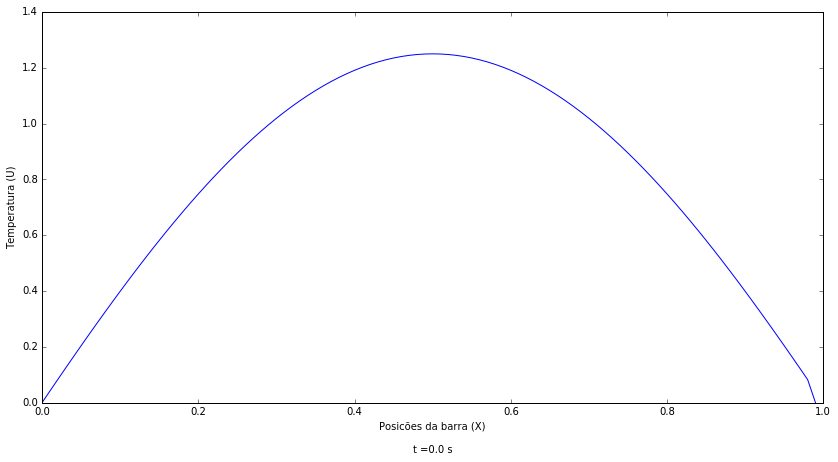

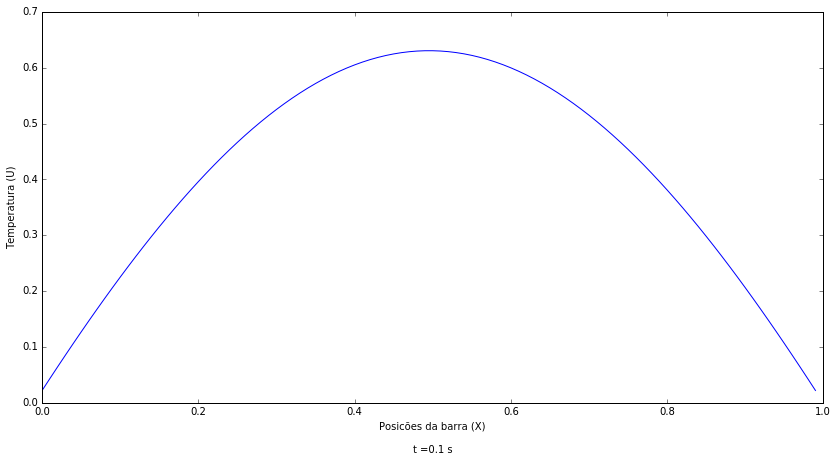

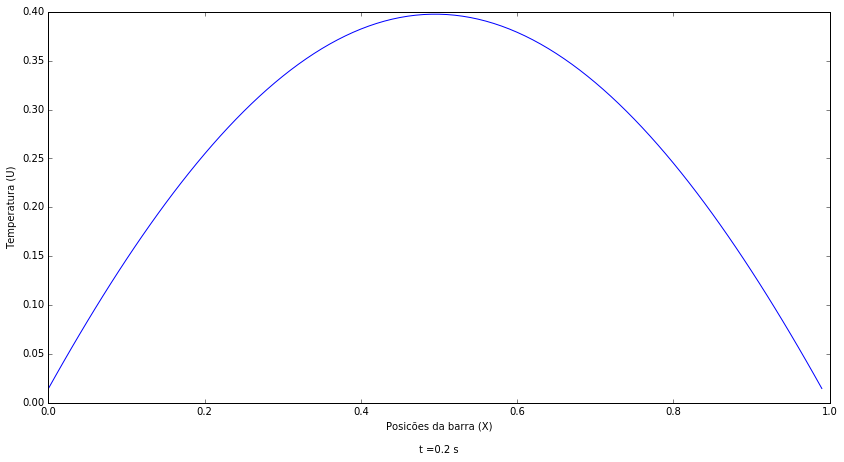

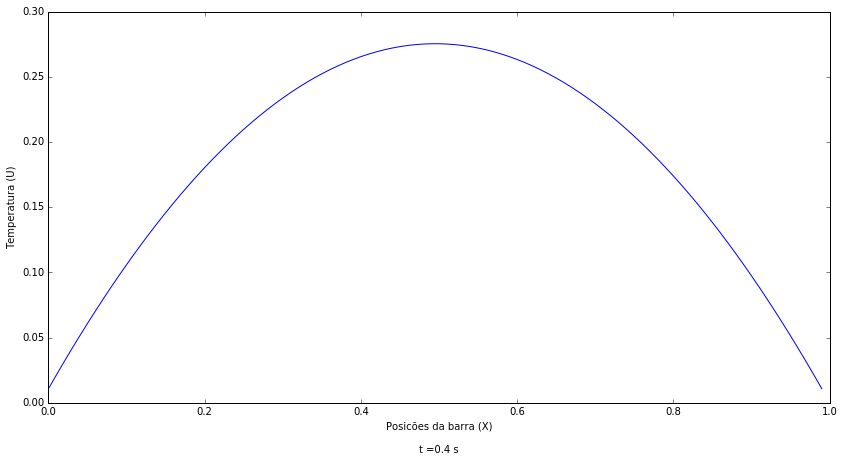

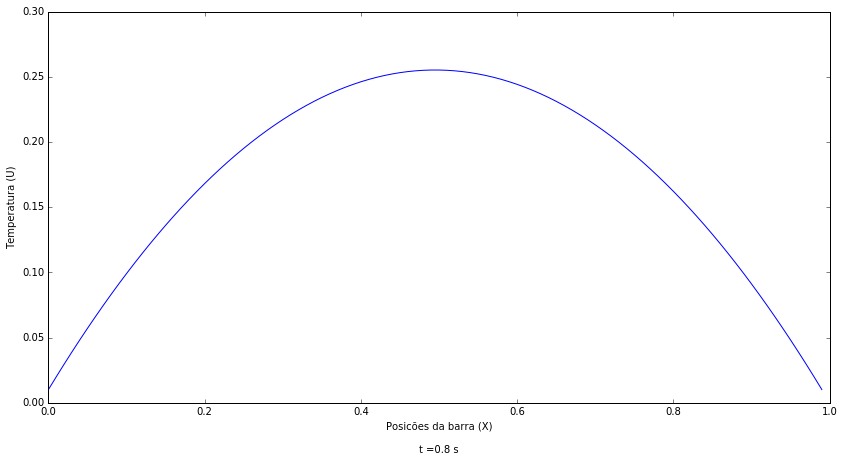

In [2]:
k = 0.00001 # Valor do passo do tempo

h = 0.01 # Valor do passo em x

lambd = _lambda(gamma,k,h) # Valor de lambda

m = int(1/h) # Quantidade de posicoes x na barra


x_list = list()
for i in np.arange(0,1,h):
    x_list.append(i)

# Matriz A
A = np.zeros((m,m))

A.itemset((0,0),1-2*lambd)
A.itemset((m-1,m-1),1-2*lambd)
A.itemset((0,1),lambd)
A.itemset((m-1,m-2),lambd)

for i in range(1,m-1):
    A.itemset((i,i),(1-2*lambd))
    A.itemset((i,i+1),lambd)
    A.itemset((i,i-1),lambd)

# Vetor uj
u = np.zeros(m)

n = 1
for x in np.arange(0.01, 0.99, h):
    u.itemset(n,f(x))
    n = n + 1

# u(j+1) = Au(j) + kψ(j)        
# Vetor de psi * k 
psik = np.empty(m); psik.fill(2*k)    

for tempo in np.arange(0,1,k):
    if tempo % 0.1 == 0:
        plt.plot(x_list, u)
        plt.gcf().set_size_inches(14,7)
        plt.ylabel('Temperatura (U)')
        plt.xlabel('Posicões da barra (X)\n\nt =' + str(tempo) + ' s')
        plt.show()
    Auj = np.dot(A,u)
    u = np.sum([Auj, psik], axis=0)


## Lambda > 1/2

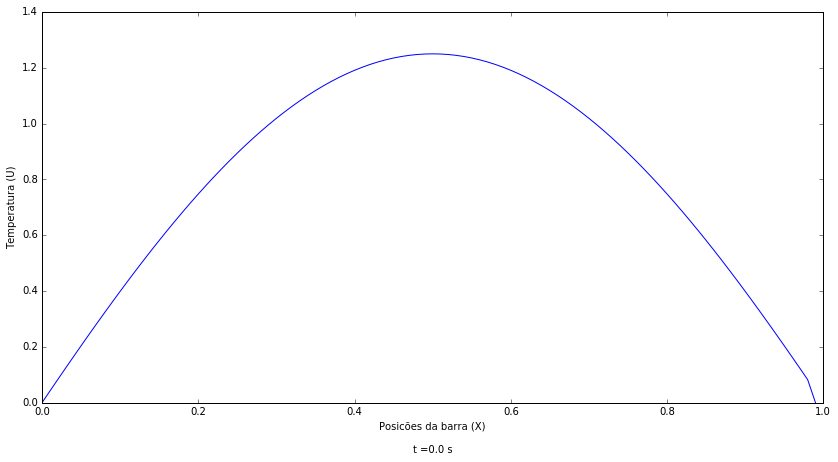

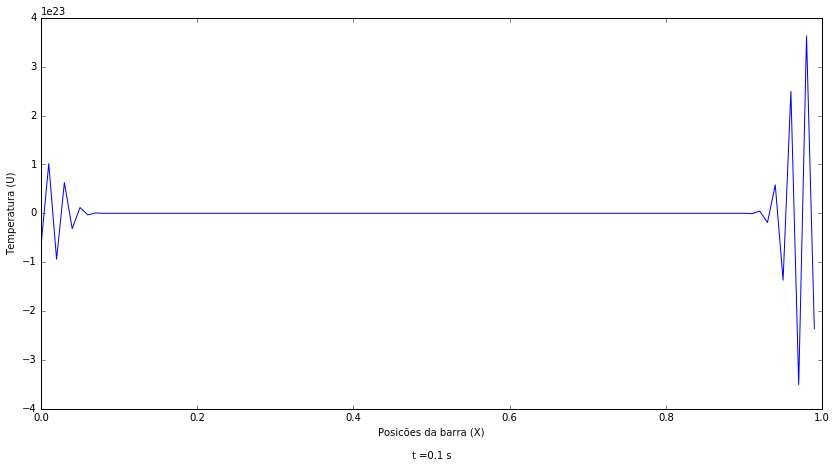

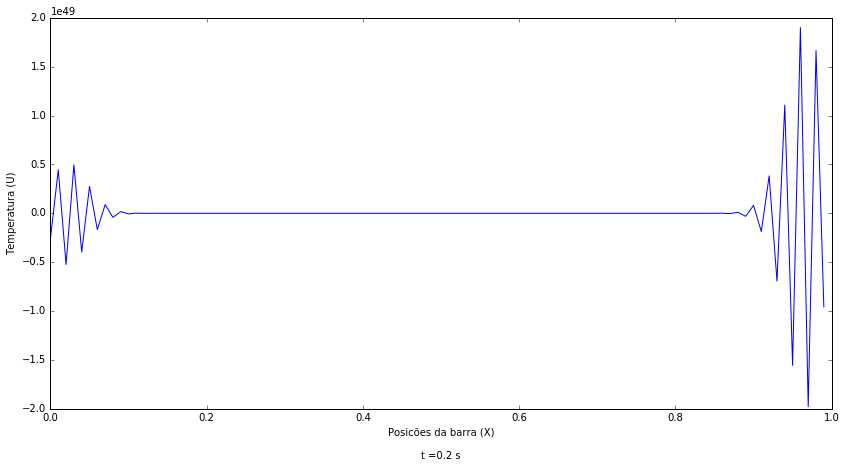

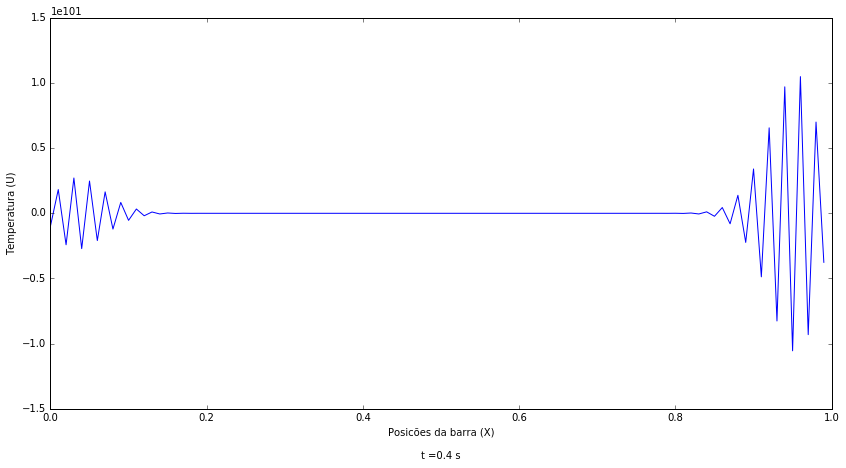

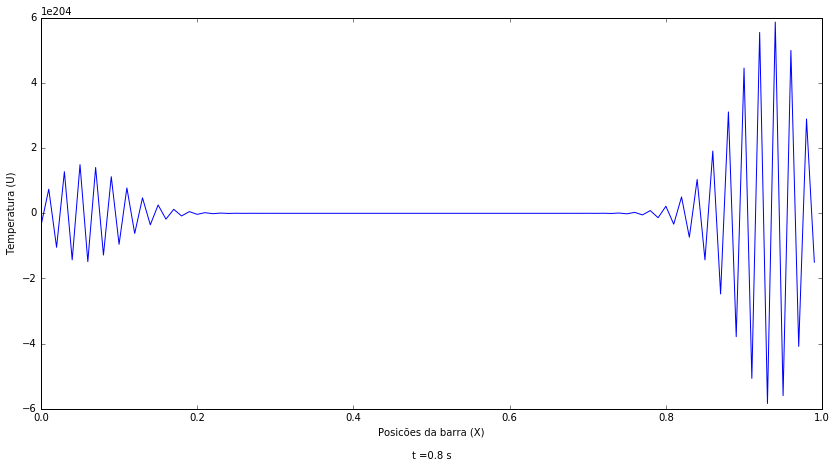

In [7]:
k = 0.01 # Valor do passo do tempo

h = 0.01 # Valor do passo em x

lambd = _lambda(gamma,k,h) # Valor de lambda

m = int(1/h) # Quantidade de posicoes x na barra


x_list = list()
for i in np.arange(0,1,h):
    x_list.append(i)

# Matriz A
A = np.zeros((m,m))

A.itemset((0,0),1-2*lambd)
A.itemset((m-1,m-1),1-2*lambd)
A.itemset((0,1),lambd)
A.itemset((m-1,m-2),lambd)

for i in range(1,m-1):
    A.itemset((i,i),(1-2*lambd))
    A.itemset((i,i+1),lambd)
    A.itemset((i,i-1),lambd)

# Vetor uj
u = np.zeros(m)

n = 1
for x in np.arange(0.01, 0.99, h):
    u.itemset(n,f(x))
    n = n + 1

# u(j+1) = Au(j) + kψ(j)        
# Vetor de psi * k 
psik = np.empty(m); psik.fill(2*k)    

for tempo in np.arange(0,1,k):
    if tempo % 0.1 == 0:
        plt.plot(x_list, u)
        plt.gcf().set_size_inches(14,7)
        plt.ylabel('Temperatura (U)')
        plt.xlabel('Posicões da barra (X)\n\nt =' + str(tempo) + ' s')
        plt.show()
    Auj = np.dot(A,u)
    u = np.sum([Auj, psik], axis=0)

# Método Implicito

### Método LU
Dada uma matriz A e B, resolve Ax = B

In [4]:
def solve_by_LU(A, B):
    P, L, U = la.lu(A)
    y = la.solve(L, np.dot(P, B))
    return la.solve(U, y)

### Implementação Método Implicito

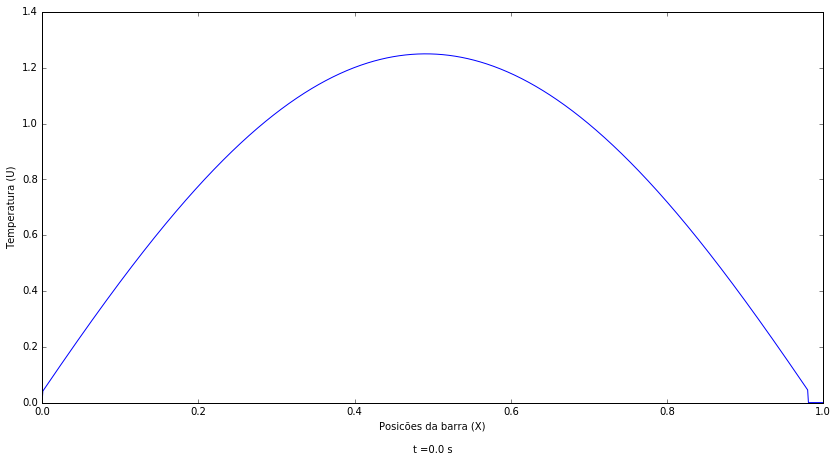

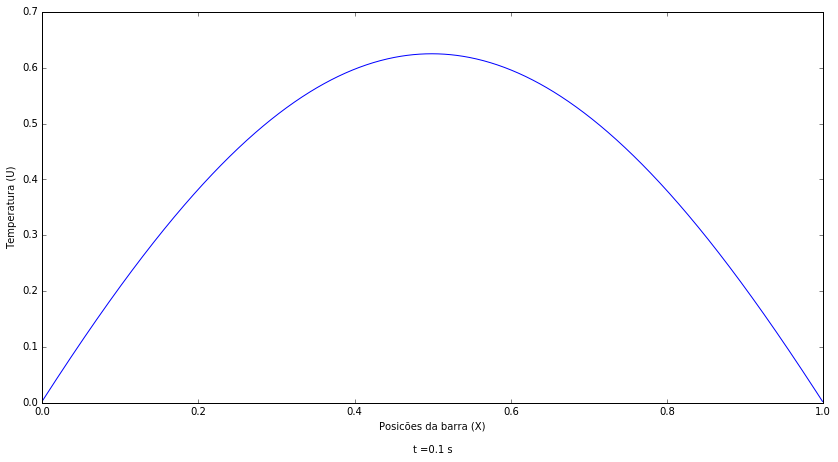

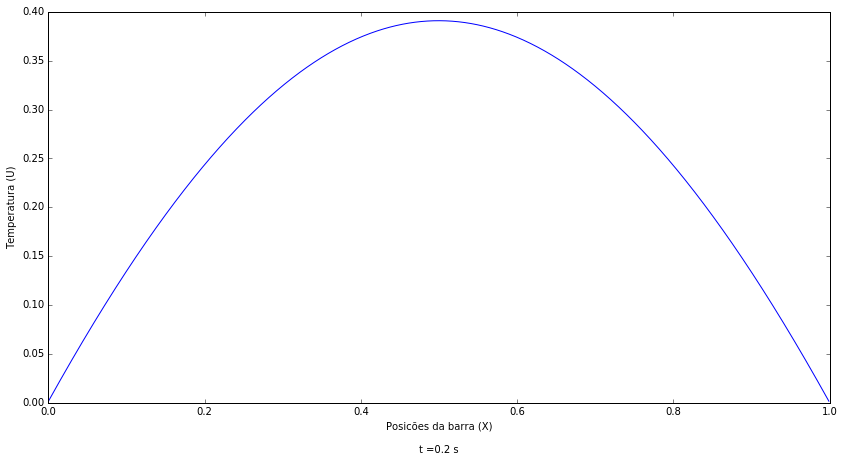

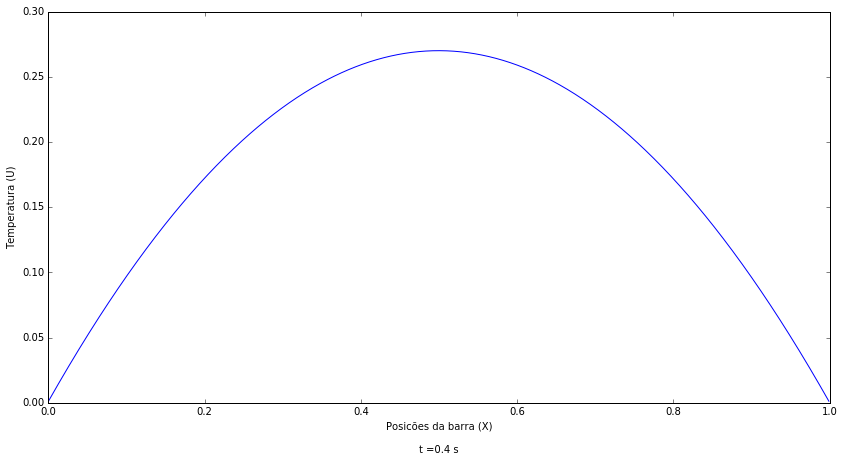

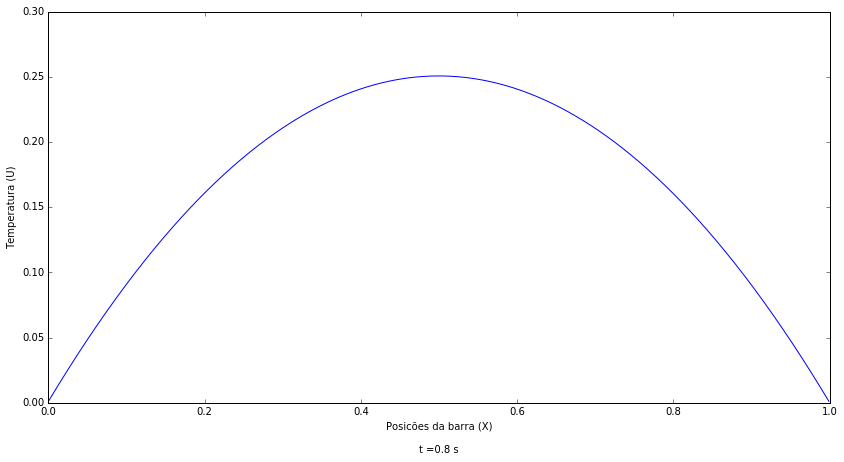

In [5]:
h = 0.001 # Valor do passo em x

k = 0.001 # Valor do passo do tempo

lambd = _lambda(gamma,k,h) # Valor de lambda

m = int(1/h) # Quantidade de posicoes x na barra

x_list = list()
for i in np.arange(0,1,h):
    x_list.append(i)

psi = np.empty(m); psi.fill(2) # vetor de psi


# Matriz A
A = np.zeros((m,m))

A.itemset((0,0),1+2*lambd)
A.itemset((m-1,m-1),1+2*lambd)
A.itemset((0,1),-lambd)
A.itemset((m-1,m-2),-lambd)

for i in range(1,m-1):
    A.itemset((i,i),(1+2*lambd))
    A.itemset((i,i+1),-lambd)
    A.itemset((i,i-1),-lambd)

# Vetor F * k
fjk = np.empty(m); fjk.fill(k*2)
fjk.itemset(0, (k*(psi.item(0)+lambd*p)))
fjk.itemset(m-1, (k*(psi.item(m-1)+lambd*q)))

# Vetor uj
u = np.zeros(m)

n = 1
for x in np.arange(0.01, 0.99, h):
    u.itemset(n,f(x))
    n = n + 1


# Soma uj + f*k
u_fjk = np.sum([u, fjk], axis=0)


for tempo in np.arange(0,1,k):
    if tempo % 0.1 == 0:
        plt.plot(x_list, u)
        plt.gcf().set_size_inches(14,7)
        plt.ylabel('Temperatura (U)')
        plt.xlabel('Posicões da barra (X)\n\nt =' + str(tempo) + ' s')
        plt.show()    
    u = solve_by_LU(A,u_fjk)
    u_fjk = np.sum([u, fjk], axis=0)